STEP1:

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [164]:
customers_df = pd.read_csv('customers.csv')
products_df = pd.read_csv('products.csv')
transactions_df = pd.read_csv('transactions.csv')

In [166]:
customers_df.shape
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [168]:
products_df.shape
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [170]:
transactions_df.shape
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [172]:
print("Customers Data Info:")
print(customers_df.info())

Customers Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [174]:
print("\nProducts Data Info:")
print(products_df.info())


Products Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [176]:
print("\nTransactions Data Info:")
print(transactions_df.info())


Transactions Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [178]:
print("\nMissing Values in Customers:")
print(customers_df.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [180]:
print("\nMissing Values in Products:")
print(products_df.isnull().sum())


Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [182]:
print("\nMissing Values in Transactions:")
print(transactions_df.isnull().sum())


Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [184]:
sns.set(style="whitegrid")


Number of Customers by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


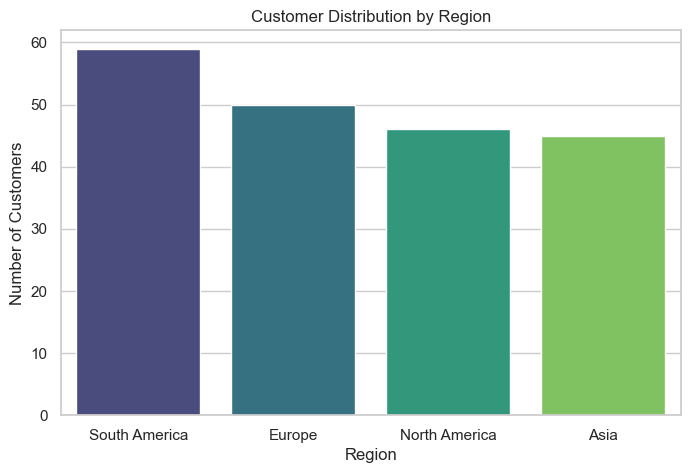

In [186]:
region_counts = customers_df['Region'].value_counts()
print("\nNumber of Customers by Region:")
print(region_counts)
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, hue=region_counts.index, palette="viridis", dodge=False, legend=False)
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.show()


Number of Products by Category:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


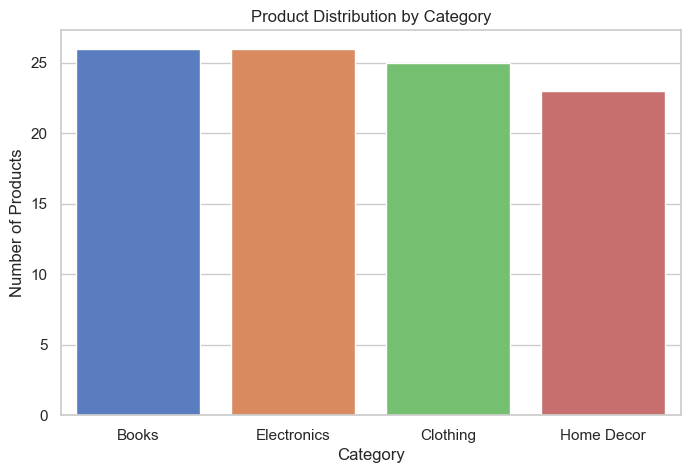

In [187]:
category_counts = products_df['Category'].value_counts()
print("\nNumber of Products by Category:")
print(category_counts)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette="muted", dodge=False, legend=False)
plt.title("Product Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=0)
plt.show()

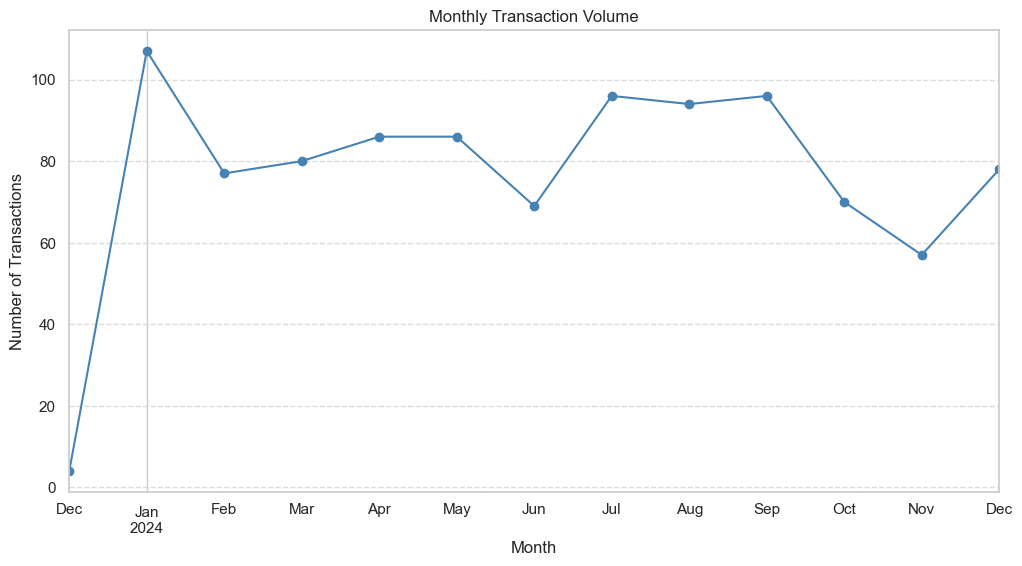

In [190]:
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
transactions_df['Month'] = transactions_df['TransactionDate'].dt.to_period("M")
monthly_transactions = transactions_df.groupby('Month').size()
plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind="line", marker="o", color="steelblue")
plt.title("Monthly Transaction Volume")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [192]:
product_sales = transactions_df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = products_df[products_df['ProductID'].isin(product_sales.index)]
top_products = top_products.merge(product_sales, on='ProductID')

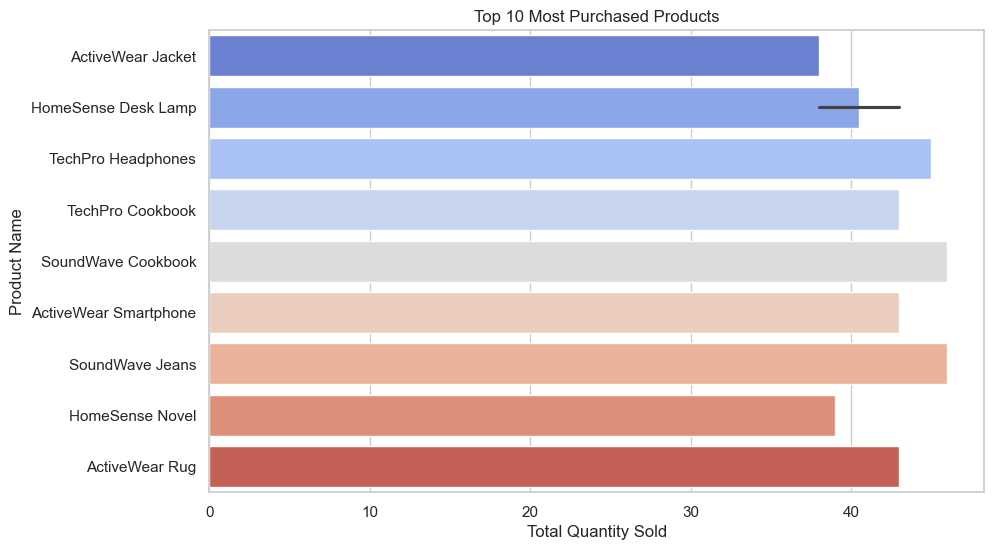

In [194]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Quantity", y="ProductName", data=top_products, hue="ProductName", palette="coolwarm", dodge=False, legend=False)
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.show()

In [195]:
high_value_transactions = transactions_df.sort_values(by="TotalValue", ascending=False).head(10)
high_value_transactions_summary = high_value_transactions[['TransactionID', 'CustomerID', 'TotalValue']]
print("\nTop 10 High-Value Transactions:")
print(high_value_transactions_summary)


Top 10 High-Value Transactions:
    TransactionID CustomerID  TotalValue
879        T00928      C0082     1991.04
509        T00499      C0065     1954.52
971        T00307      C0044     1927.12
562        T00224      C0171     1879.08
565        T00503      C0013     1879.08
566        T00558      C0169     1879.08
560        T00070      C0051     1879.08
997        T00922      C0018     1839.44
125        T00482      C0066     1825.12
119        T00034      C0168     1825.12


STEP2:

In [199]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [201]:
customer_transactions = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

In [203]:
aggregation_dict = {
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Region': lambda x: x.mode()[0] 
}

In [205]:
if 'Price' in customer_transactions.columns:
    aggregation_dict['Price'] = 'mean'

customer_features = customer_transactions.groupby('CustomerID').agg(aggregation_dict).reset_index()

In [207]:
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

In [209]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))

In [211]:
similarity_matrix = cosine_similarity(normalized_features)

In [213]:
lookalikes = {}
for i in range(20):
    customer_id = customer_features.iloc[i]['CustomerID']
    similarities = list(enumerate(similarity_matrix[i]))
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)[1:4]  # Exclude self-match
    lookalikes[customer_id] = [(customer_features.iloc[j]['CustomerID'], score) for j, score in similarities]

In [215]:
lookalike_df = pd.DataFrame({
    'CustomerID': lookalikes.keys(),
    'Lookalikes': [str(v) for v in lookalikes.values()]
})

In [217]:
lookalike_df.to_csv('Lookalike.csv', index=False)
print("Lookalike model results saved to Lookalike.csv")

Lookalike model results saved to Lookalike.csv


In [219]:
print("Feature Importance (Mean Values):")
print(customer_features.drop(columns=['CustomerID']).mean())

Feature Importance (Mean Values):
TotalValue              3467.314372
Quantity                  12.748744
Region_Europe              0.251256
Region_North America       0.231156
Region_South America       0.296482
dtype: float64


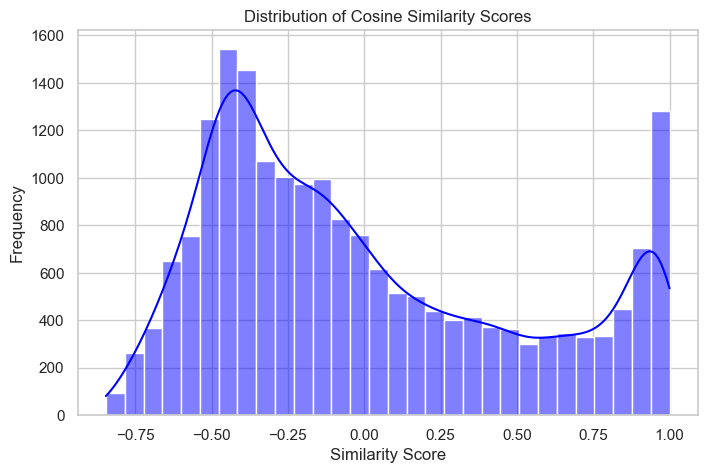

In [221]:
similarity_scores = similarity_matrix[np.triu_indices(len(similarity_matrix), k=1)]
plt.figure(figsize=(8, 5))
sns.histplot(similarity_scores, kde=True, bins=30, color='blue')
plt.title("Distribution of Cosine Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()

In [222]:
print("\nSample Recommendations:")
for customer_id, matches in list(lookalikes.items())[:5]:
    print(f"Customer {customer_id} Lookalikes: {matches}")


Sample Recommendations:
Customer C0001 Lookalikes: [('C0107', 0.9964159076264131), ('C0137', 0.9956998211410997), ('C0184', 0.9956410553768718)]
Customer C0002 Lookalikes: [('C0088', 0.9961371521325482), ('C0142', 0.9882313579578121), ('C0159', 0.9732006290718161)]
Customer C0003 Lookalikes: [('C0147', 0.9977417997931421), ('C0190', 0.996976191972914), ('C0174', 0.9820309474537442)]
Customer C0004 Lookalikes: [('C0113', 0.9943242911409664), ('C0102', 0.9792226347243079), ('C0169', 0.9784778256518788)]
Customer C0005 Lookalikes: [('C0186', 0.9969881420656154), ('C0159', 0.9964676259047148), ('C0140', 0.9912059324692435)]


In [223]:
lookalike_regions = []
for customer_id, matches in lookalikes.items():
    customer_region = customer_transactions[customer_transactions['CustomerID'] == customer_id]['Region'].mode()[0]
    matched_regions = [
        customer_transactions[customer_transactions['CustomerID'] == match[0]]['Region'].mode()[0]
        for match in matches
    ]
    lookalike_regions.append((customer_region, matched_regions))

In [227]:
print("\nRegion-Wise Lookalike Analysis:")
for entry in lookalike_regions[:5]:
    print(f"Customer Region: {entry[0]}, Matched Regions: {entry[1]}")


Region-Wise Lookalike Analysis:
Customer Region: South America, Matched Regions: ['South America', 'South America', 'South America']
Customer Region: Asia, Matched Regions: ['Asia', 'Asia', 'Asia']
Customer Region: South America, Matched Regions: ['South America', 'South America', 'South America']
Customer Region: South America, Matched Regions: ['South America', 'South America', 'South America']
Customer Region: Asia, Matched Regions: ['Asia', 'Asia', 'Asia']


STEP3:

In [230]:
mean_similarity = np.mean(similarity_scores)
median_similarity = np.median(similarity_scores)
max_similarity = np.max(similarity_scores)

In [232]:
print("\nSimilarity Score Summary:")
print(f"Mean Similarity: {mean_similarity:.4f}")
print(f"Median Similarity: {median_similarity:.4f}")
print(f"Max Similarity: {max_similarity:.4f}")


Similarity Score Summary:
Mean Similarity: -0.0023
Median Similarity: -0.1427
Max Similarity: 1.0000


In [234]:
customer_id = customer_features.iloc[0]['CustomerID']  # Example customer
top_matches = lookalikes[customer_id]
print(f"\nLogical Check for Customer {customer_id}:")
print(f"Top Matches: {top_matches}")


Logical Check for Customer C0001:
Top Matches: [('C0107', 0.9964159076264131), ('C0137', 0.9956998211410997), ('C0184', 0.9956410553768718)]


In [236]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler

In [238]:
customers_df = pd.read_csv('customers.csv')
transactions_df = pd.read_csv('transactions.csv')

In [240]:
transactions_df['TotalValue'] = transactions_df['Quantity'] * transactions_df['Price']
customer_summary = transactions_df.groupby('CustomerID').agg(
    TotalSpending=('TotalValue', 'sum'),
    Frequency=('TransactionID', 'count')
).reset_index()

In [242]:
customer_data = pd.merge(customers_df, customer_summary, on='CustomerID')
customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

In [244]:
features = ['TotalSpending', 'Frequency'] + [col for col in customer_data.columns if 'Region' in col]
scaler = StandardScaler()
normalized_data = scaler.fit_transform(customer_data[features])

In [246]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(normalized_data)

C:\Users\Rajesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [248]:
db_index = davies_bouldin_score(normalized_data, customer_data['Cluster'])
silhouette_avg = silhouette_score(normalized_data, customer_data['Cluster'])

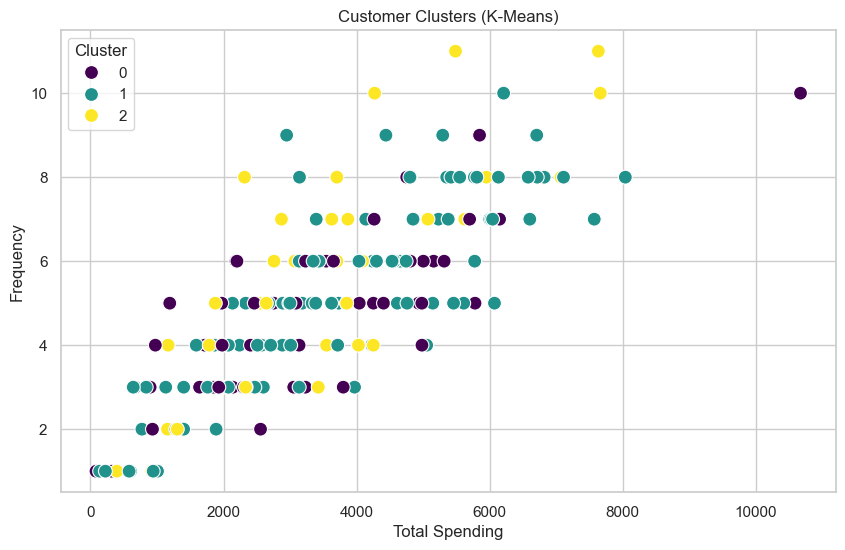

In [250]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_data['TotalSpending'],
    y=customer_data['Frequency'],
    hue=customer_data['Cluster'],
    palette='viridis',
    s=100
)
plt.title("Customer Clusters (K-Means)")
plt.xlabel("Total Spending")
plt.ylabel("Frequency")
plt.legend(title='Cluster')
plt.show()

In [251]:
print(f"Number of Clusters: {kmeans.n_clusters}")
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Silhouette Score: {silhouette_avg:.4f}")

Number of Clusters: 3
Davies-Bouldin Index: 1.0740
Silhouette Score: 0.4138
